In [1]:
import queue1 as qu 
from random import randint
from random import expovariate
import random as rm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

In [2]:
rooms = 100
tet = 0.2
we = 180
wh = 200
lam_e = 20
lam_h = 30
u=0.5

def profit_split(q, wh=wh, we=we, tet=tet, lam_e=lam_e, lam_h=lam_h, u=u, days=100):
    queue_front_desk = qu.Queue(days=days, rooms=rooms-q, price=wh, lam=lam_h, u=u)
    queue_online = qu.Queue(days=days,rooms=q, price=we, lam=lam_e, u=u)
    return (sum(queue_front_desk.profit)+sum(queue_online.profit)*(1-tet))/days

def profit_share(wh=wh, we=we, lam_e=lam_e, lam_h=lam_h, u=u, tet=tet, days=100):
    queue = qu.CompleteSharing(days=days, price_of=wh, price_on=we, tet=tet, lam_online=lam_e, lam_offline=lam_h, u=u)
    return sum(queue.profit)/days

In [3]:
from math import factorial as fact
Q = 100 

def Pi_h_f(wh=wh, we=we, lam_h=lam_h, lam_e=lam_e, q=0, tet=tet, u=u):
    return \
        (wh*lam_h/u)*\
        (1 - (lam_h**(Q-q))/((u**(Q-q)*fact(Q-q))*(sum([lam_h**k/(u**k * fact(k)) \
                                                    for k in range(Q-q+1)])))) + \
        ((1-tet)*we*lam_e/u)*\
        (1 - (lam_e**q)/((u**(q)*fact(q))*(sum([lam_e**k/(u**k * fact(k)) \
                                                    for k in range(q+1)]))))

def Pcom_f(lam_e, lam_h, u):
    return ((lam_e+lam_h)**Q)/((u**Q)*fact(Q))/(sum([(lam_e+lam_h)**k/(u**k * fact(k)) \
                                                 for k in range(1, Q+1)]))
                                                 
def Pi_com_f(we=we, wh=wh, lam_e=lam_e, lam_h=lam_h, tet=tet, u=u):
    return (wh*lam_h+(1-tet)*we*lam_e)*(1-Pcom_f(lam_e, lam_h, u))/u

##  Фактор стоимости бронирования (wh и we) 

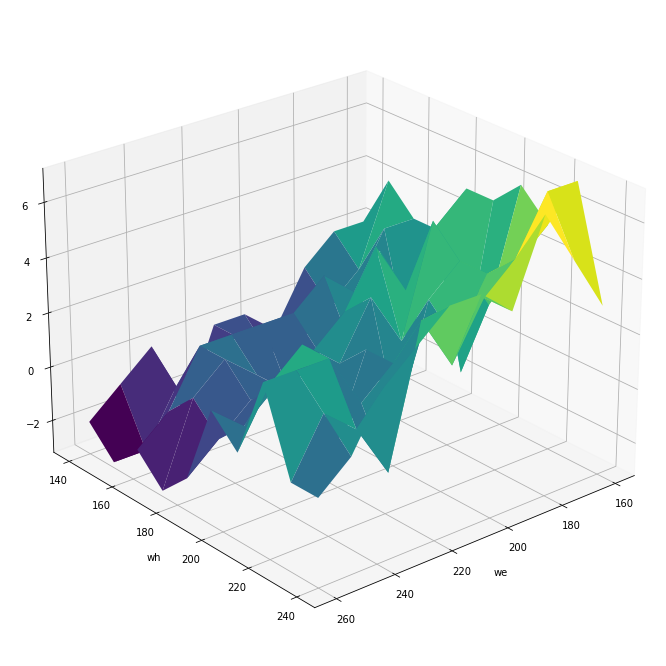

In [24]:
size = 10
we_ = np.linspace(160, 260, size)
wh_ = np.linspace(140, 240, size)

X, Y = np.meshgrid(we_, wh_)

Z_optimal = [[0 for _ in range(size)] for _ in range(size)]
q_optimal = [[0 for _ in range(size)] for _ in range(size)]

Z_optimal_form = [[0 for _ in range(size)] for _ in range(size)]
q_optimal_form = [[0 for _ in range(size)] for _ in range(size)]

diff = [[0 for _ in range(size)] for _ in range(size)]

for q_now in range(34, 43, 1):
   for i in range(size):
        for j in range(size):
            profit_ = profit_split(we=X[i][j], wh=Y[i][j], q=q_now, days=2500)
            if Z_optimal[i][j] < profit_:
                Z_optimal[i][j] = profit_
                q_optimal[i][j] = q_now
            if Z_optimal_form[i][j] < Pi_h_f(we=X[i][j], wh=Y[i][j], q=q_now):
                Z_optimal_form[i][j] = Pi_h_f(we=X[i][j], wh=Y[i][j], q=q_now)
                q_optimal_form[i][j] = q_now
                
            diff[i][j] = q_optimal[i][j] - q_optimal_form[i][j]



Z = np.array(diff)

figure(figsize=(12,12))

ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("we")
plt.ylabel("wh")
ax.view_init(25, 50) #  поворачиваем график
plt.show()

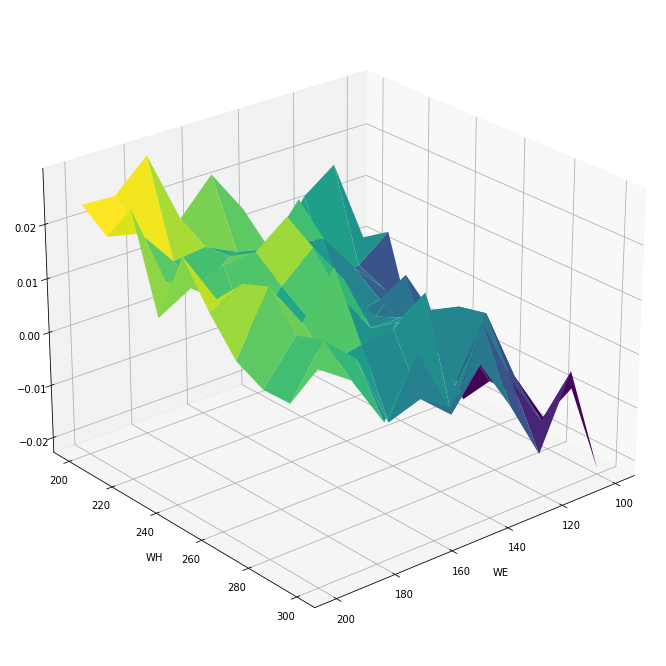

In [25]:
size = 10
we_ = np.linspace(100, 200, size)
wh_ = np.linspace(200, 300, size)

X, Y = np.meshgrid(we_, wh_)

Z_optimal = [[0 for _ in range(size)] for _ in range(size)]
q_optimal = [[0 for _ in range(size)] for _ in range(size)]

Z_optimal_form = [[0 for _ in range(size)] for _ in range(size)]
q_optimal_form = [[0 for _ in range(size)] for _ in range(size)]

for q_now in range(30, 50, 2):
   for i in range(size):
        for j in range(size):
            profit_ = profit_split(we=X[i][j], wh=Y[i][j], q=q_now, days=2500)
            if Z_optimal[i][j] < profit_:
                Z_optimal[i][j] = profit_
                q_optimal[i][j] = q_now
            if Z_optimal_form[i][j] < Pi_h_f(we=X[i][j], wh=Y[i][j], q=q_now):
                Z_optimal_form[i][j] = Pi_h_f(we=X[i][j], wh=Y[i][j], q=q_now)
                q_optimal_form[i][j] = q_now

alpha = [[0 for _ in range(size)] for _ in range(size)]
for i in range(size):
    for j in range(size):
        alpha[i][j] = Z_optimal[i][j] / profit_share(we=X[i][j], wh=Y[i][j], days=2500)

alpha_form = Z_optimal_form/Pi_com_f(we=X, wh=Y)

diff = [[alpha[i][j] - alpha_form[i][j] for j in range(size)]for i in range(size)]

Z = np.array(diff)

figure(figsize=(12, 12))
ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("WE")
plt.ylabel("WH")
ax.view_init(25, 50) #  поворачиваем график
plt.show()

## Фактор доли стоимости бронирования в качестве комиссии (tet)

<AxesSubplot:xlabel='tet', ylabel='q*'>

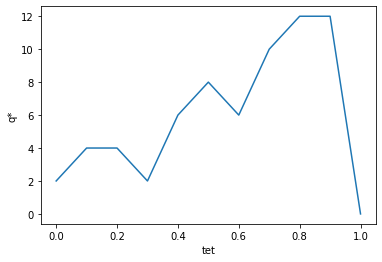

In [4]:
df = pd.DataFrame() 
df['tet'] = [tet_/10 for tet_ in range(11)]

Pi_optimal = [0 for _ in range(11)]
q_optimal = [0 for _ in range(11)]

Pi_optimal_form = [0 for _ in range(11)]
q_optimal_form = [0 for _ in range(11)]


for tet_ in range(11):
    for q_now in range(0, 60, 2):
        profit_ = profit_split(q=q_now, tet=tet_/10, days=10000)
        if Pi_optimal[tet_] < profit_:
            Pi_optimal[tet_] = profit_
            q_optimal[tet_] = q_now
        if Pi_optimal_form[tet_] < Pi_h_f(q=q_now, tet=tet_/10):
            Pi_optimal_form[tet_] = Pi_h_f(q=q_now, tet=tet_/10)
            q_optimal_form[tet_] = q_now

df['q*'] = list(map(lambda x,y: x-y, q_optimal, q_optimal_form))
            
sns.lineplot(data=df, x="tet", y="q*")

<AxesSubplot:xlabel='tet', ylabel='alpha'>

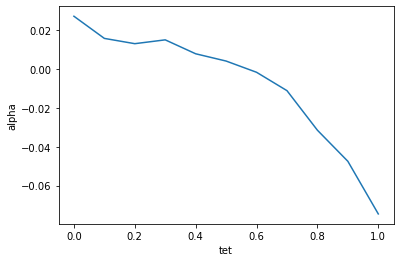

In [29]:
Pi_com_optimal = [profit_share(tet=tet_/10, days=10000) for tet_ in range(11)]
Pi_com_optimal_form = [Pi_com_f(tet=tet_/10) for tet_ in range(11)]

df['alpha'] = [Pi_optimal[i]/Pi_com_optimal[i]-Pi_optimal_form[i]/Pi_com_optimal_form[i] for i in range(11)]
    
sns.lineplot(data=df, x="tet", y="alpha")

## Фактор скорости поступления клиентов (lam e и lam h) 

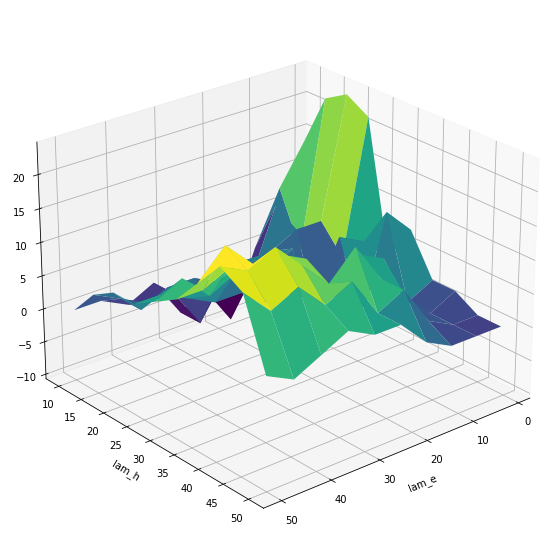

In [5]:
size = 10
lam_e_ = np.linspace(1, 50, size)
lam_h_ = np.linspace(10, 50, size)

X, Y = np.meshgrid(lam_e_, lam_h_)

Z_optimal = [[0 for _ in range(size)] for _ in range(size)]
q_optimal = [[0 for _ in range(size)] for _ in range(size)]

Z_optimal_form = [[0 for _ in range(size)] for _ in range(size)]
q_optimal_form = [[0 for _ in range(size)] for _ in range(size)]

diff = [[0 for _ in range(size)] for _ in range(size)]

for q_now in range(20, 80, 2):
   for i in range(size):
        for j in range(size):
            profit_ = profit_split(lam_e=X[i][j], lam_h=Y[i][j], q=q_now, days=2500)
            if Z_optimal[i][j] < profit_:
                Z_optimal[i][j] = profit_
                q_optimal[i][j] = q_now
            if Z_optimal_form[i][j] < Pi_h_f(lam_e=X[i][j], lam_h=Y[i][j], q=q_now):
                Z_optimal_form[i][j] = Pi_h_f(lam_e=X[i][j], lam_h=Y[i][j], q=q_now)
                q_optimal_form[i][j] = q_now
                
            diff[i][j] = q_optimal[i][j] - q_optimal_form[i][j]
            
Z = np.array(diff)

figure(figsize=(10,10))

ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("lam_e")
plt.ylabel("lam_h")
ax.view_init(25, 50) #  поворачиваем график
plt.show()


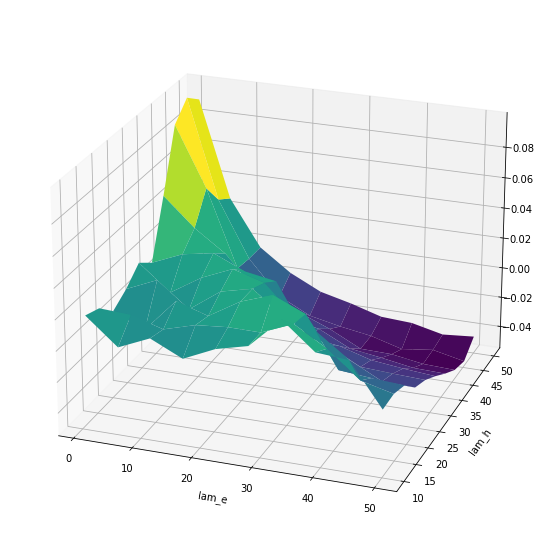

In [9]:
Z = np.array(Z_optimal)
Z_form = np.array(Z_optimal_form)

alpha = [[0 for _ in range(size)] for _ in range(size)]
alpha_form = [[0 for _ in range(size)] for _ in range(size)]
diff = [[0 for _ in range(size)] for _ in range(size)]

for i in range(size):
    for j in range(size):
        alpha[i][j] = Z[i][j] / profit_share(lam_e=X[i][j], lam_h=Y[i][j], days=2500)
        alpha_form[i][j] = Z_form[i][j] / Pi_com_f(lam_e=X[i][j], lam_h=Y[i][j])
        
        diff[i][j] = alpha[i][j] - alpha_form[i][j]
        
Z = np.array(diff)
figure(figsize=(10, 10))

ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("lam_e")
plt.ylabel("lam_h")
ax.view_init(23, -90+20) #  поворачиваем график
plt.show()

## Фактор ожидаемого времени пребывания клиентов в отеле u 

<AxesSubplot:xlabel='1/u', ylabel='q*'>

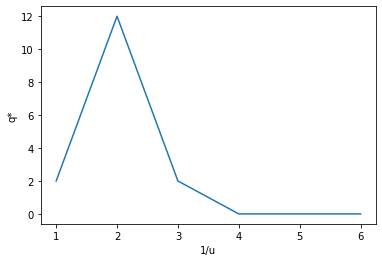

In [13]:
df = pd.DataFrame() 
df['1/u'] = [i for i in range(1, 7)]

Pi_optimal = [0 for _ in range(1, 7)]
q_optimal = [0 for _ in range(1, 7)]

Pi_optimal_form = [0 for _ in range(1, 7)]
q_optimal_form = [0 for _ in range(1, 7)]

for u_ in range(1, 7):
    for q_now in range(0, 60, 2):
        profit_ = profit_split(wh=200, we=180, q=q_now ,u=1/u_, lam_h=40, lam_e=30, days=10000)
        if Pi_optimal[u_-1] < profit_: 
            Pi_optimal[u_-1] = profit_ 
            q_optimal[u_-1]=q_now
        if Pi_optimal_form[u_-1] < Pi_h_f(wh=200, we=180, q=q_now ,u=1/u_, lam_h=40, lam_e=30): 
            Pi_optimal_form[u_-1] = Pi_h_f(wh=200, we=180, q=q_now ,u=1/u_, lam_h=40, lam_e=30)
            q_optimal_form[u_-1]=q_now


df['q*'] = list(map(lambda x,y: x-y, q_optimal, q_optimal_form))
    
sns.lineplot(data=df, x="1/u", y="q*")

<AxesSubplot:xlabel='1/u', ylabel='alpha'>

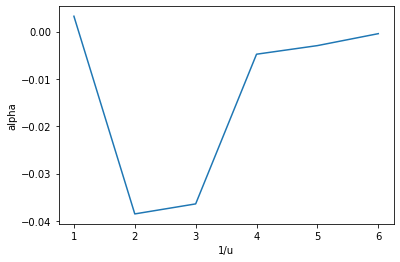

In [14]:
Pi_com_optimal = [profit_share(u=1/i, wh=200, we=180, lam_h=40, lam_e=30, days=10000) for i in range(1, 7)]
Pi_com_optimal_form = [Pi_com_f(u=1/i, wh=200, we=180, lam_h=40, lam_e=30) for i in range(1, 7)]

df['alpha'] = [Pi_optimal[i]/Pi_com_optimal[i]-Pi_optimal_form[i]/Pi_com_optimal_form[i] for i in range(len(Pi_com_optimal))]

sns.lineplot(data=df, x="1/u", y="alpha")